<a href="https://colab.research.google.com/github/samantha96/Prejudice-Remover-Regularizer-Implementation/blob/main/Xuehan_PRLR_0321_onehot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch as t
import torch.nn as nn
from torch.nn import functional as F
import numpy as np
import pandas as pd 
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:

kiva = pd.read_csv(/data/kivaa")

SyntaxError: unterminated string literal (detected at line 1) (3061835022.py, line 1)

## 1.Data Preprocessing

In [3]:
columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']
Train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,names=columns)
Test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,names=columns,skiprows=1)

In [4]:
def process(dataset):
    df = dataset 
    df=df.replace(" ?",np.nan).dropna()#df.isnull().sum()
    df['income']=df['income'].map({' <=50K': 0, ' <=50K.': 0,' >50K': 1,' >50K.': 1})
    df['sex']=df['sex'].map({' Female': 1, ' Male': 0})
    return df
  

In [ ]:
def bin_var(data, var, bins, group_names):
    # Assign the input dataset (likely a pandas DataFrame) to a local variable `ds`.
    ds = data

    # Assign the input bins to a variable `bin_value`.
    # This represents the intervals or ranges that will be used to group (bin) the values of the variable.
    bin_value = bins

    # Assign the input group names (labels for each bin) to a variable `group`.
    # This list contains names or labels that will be assigned to each bin.
    group = group_names

    # Use the `pd.cut()` function to bin the values of the specified variable (column) in the dataset.
    # `ds[var]` refers to the column in the dataset that will be binned.
    # `bin_value` specifies the bin edges or intervals, defining how the values should be grouped.
    # `labels=group` assigns the corresponding labels (group names) to each bin based on the values in the `group` list.
    data[var] = pd.cut(ds[var], bin_value, labels=group)


In [ ]:
def workclas(x):
    # Check if the string 'Private' is present in the input `x`
    # `re.search('Private', x)` searches for the substring 'Private' in `x`
    # If found, return the string 'Private'
    if re.search('Private', x):
        return 'Private'

    # Check if the string 'Self' is present in the input `x`
    # `re.search('Self', x)` searches for the substring 'Self' in `x`
    # If found, return the string 'selfempl' (short for self-employed)
    elif re.search('Self', x):
        return 'selfempl'

    # Check if the string 'gov' is present in the input `x`
    # `re.search('gov', x)` searches for the substring 'gov' in `x`
    # If found, return the string 'gov' (likely referring to government employment)
    elif re.search('gov', x):
        return 'gov'

    # If none of the above conditions are met, return 'others'
    # This serves as a catch-all for any other values that don't match the specified patterns
    else:
        return 'others'


In [ ]:
def relation(x):
    # Check if the string 'Husband' is present in the input `x`
    # If found, return the string 'married'
    if re.search('Husband', x):
        return 'married'

    # Check if the string 'Wife' is present in the input `x`
    # If found, return the string 'married'
    elif re.search('Wife', x):
        return 'married'

    # If neither 'Husband' nor 'Wife' is found, return the original input `x`
    else:
        return x


In [8]:
def occup(x):
  if re.search('managerial', x):
    return 'Highskill'
  elif re.search('specialty',x):
    return 'Highskill'
  elif re.search('clerical',x):
    return 'Highskill'
  else:
    return 'Lowskill'

In [ ]:
def featureeng(df):
    # Binning the 'education_num' column into 3 categories: 'Low', 'Medium', and 'High'
    # Based on the range of values provided: [0,6,11,16]
    bin_var(df, 'education_num', [0,6,11,16], ['Low', 'Medium', 'High'])

    # Binning the 'hours_per_week' column into 4 categories: 'Low', 'Medium', 'High', 'VeryHigh'
    # Based on the range of values provided: [0,35,40,60,100]
    bin_var(df, 'hours_per_week', [0,35,40,60,100], ['Low', 'Medium', 'High', 'VeryHigh'])

    # Binning the 'age' column into 3 categories: 'Young', 'Middle_aged', and 'Old'
    # Based on the range of values provided: [17,30,55,100]
    bin_var(df, 'age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

    # Cleaning and transforming the 'workclass' column:
    # Stripping any leading/trailing spaces and applying the `workclas` function to categorize values
    df['workclass'] = df.workclass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))

    # Cleaning and transforming the 'occupation' column:
    # Stripping spaces and applying the `occup` function to categorize values
    df['occupation'] = df.occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))

    # Cleaning and transforming the 'relationship' column:
    # Stripping spaces and applying the `relation` function to group relationship statuses
    df['relationship'] = df.relationship.apply(lambda x: x.strip()).apply(lambda x: relation(x))

    # Dropping unnecessary columns that are not needed for the model:
    # 'marital_status', 'education', 'fnlwgt', 'capital_gain', 'capital_loss', 'native_country'
    df.drop(['marital_status', 'education', 'fnlwgt', 'capital_gain', 'capital_loss', 'native_country'], axis=1, inplace=True)

    # Encoding all columns as categorical values using `LabelEncoder`
    # This converts string categories to numerical values for modeling
    df = df.astype(str).apply(lambda col: LabelEncoder().fit_transform(col))

    # Returning the transformed dataframe
    return df


In [ ]:
def one_hot(data):
    # Store the input data in a variable for easier reference
    x_data = data
    
    # Perform one-hot encoding on the first column of the data
    x_onehot = F.one_hot(x_data[:, 0])  # x_data[:, 0] selects the first column

    # Iterate over the remaining columns in the dataset (from index 1 to the last column)
    for i in range(1, x_data.shape[1]):  # x_data.shape[1] gives the total number of columns
        # Perform one-hot encoding on the current column
        x = F.one_hot(x_data[:, i])  # x_data[:, i] selects the i-th column

        # Concatenate the newly created one-hot encoded column with the existing one-hot encoded data
        x_onehot = t.cat((x_onehot, x), 1)  # t.cat concatenates along dimension 1 (columns)

    # Return the fully one-hot encoded data
    return x_onehot


### Process training dataset

In [11]:
df = process(Train_data) # y(target): income >50:1  <50:0
df = featureeng(df)

Only Female dataset for training

In [ ]:
# Filter the DataFrame to select only female entries (where 'sex' is 1)
f = df.loc[df['sex'] == 1]

# Apply one-hot encoding to the features, dropping the 'income' and 'sex' columns
# Convert the DataFrame to a NumPy array, then to a PyTorch tensor, and ensure it's in float32 format
x_female = one_hot(t.from_numpy(np.array(f.drop(columns=['income', 'sex'])))).to(t.float32)

# Extract the 'income' column, convert it to a NumPy array, and reshape it to have one column
# This creates the target variable for the female entries
y_female = t.from_numpy(np.array(f['income']).astype('float32')).reshape(x_female.shape[0], 1)

# Concatenate the one-hot encoded features (x_female) with the labels (y_female) along the column axis
xy_female = t.cat((x_female, y_female), 1)


Only male dataset for training

In [ ]:
# Filter the DataFrame to select only male entries (where 'sex' is 0)
m = df.loc[df['sex'] == 0]

# Apply one-hot encoding to the features, dropping the 'income' and 'sex' columns
# Convert the DataFrame to a NumPy array, then to a PyTorch tensor, and ensure it's in float32 format
x_male = one_hot(t.from_numpy(np.array(m.drop(columns=['income', 'sex'])))).to(t.float32)

# Extract the 'income' column, convert it to a NumPy array, and reshape it to have one column
# This creates the target variable for the male entries
y_male = t.from_numpy(np.array(m['income']).astype('float32')).reshape(x_male.shape[0], 1)

# Concatenate the one-hot encoded features (x_male) with the labels (y_male) along the column axis
xy_male = t.cat((x_male, y_male), 1)


### Process test dataset

In [14]:
tf = process(Test_data) # y(target): income >50:1  <50:0
tf = featureeng(tf)

In [ ]:
# Apply one-hot encoding to the test features, dropping the 'income' and 'sex' columns
# Convert the DataFrame to a NumPy array, then to a PyTorch tensor, and ensure it's in float32 format
x_test = one_hot(t.from_numpy(np.array(tf.drop(columns=['income', 'sex'])))).to(t.float32)

# Extract the 'income' column from the test DataFrame, convert it to a NumPy array, and reshape it to have one column
# This creates the target variable for the test dataset
y_test = t.from_numpy(np.array(tf['income']).astype('float32')).reshape(x_test.shape[0], 1)


In [ ]:
# Filter the DataFrame to select only the rows where the 'sex' column equals 1 (indicating female)
f = df.loc[df['sex'] == 1]

# Create one-hot encoded features for the female subset, dropping the 'income' and 'sex' columns
# Convert the filtered DataFrame to a NumPy array, then to a PyTorch tensor, and ensure it's in float32 format
xf_test = one_hot(t.from_numpy(np.array(f.drop(columns=['income', 'sex'])))).to(t.float32)

# Extract the 'income' column from the filtered DataFrame, convert it to a NumPy array, and reshape it to have one column
# This creates the target variable for the female subset of the test dataset
yf_test = t.from_numpy(np.array(f['income']).astype('float32')).reshape(xf_test.shape[0], 1)


In [ ]:
# Filter the DataFrame to select only the rows where the 'sex' column equals 0 (indicating male)
m = df.loc[df['sex'] == 0]

# Create one-hot encoded features for the male subset, dropping the 'income' and 'sex' columns
# Convert the filtered DataFrame to a NumPy array, then to a PyTorch tensor, and ensure it's in float32 format
xm_test = one_hot(t.from_numpy(np.array(m.drop(columns=['income', 'sex'])))).to(t.float32)

# Extract the 'income' column from the filtered DataFrame, convert it to a NumPy array, and reshape it to have one column
# This creates the target variable for the male subset of the test dataset
ym_test = t.from_numpy(np.array(m['income']).astype('float32')).reshape(xm_test.shape[0], 1)


In [ ]:
# Define a logistic regression model using PyTorch's nn.Module
class LogisticRegression(nn.Module):
    def __init__(self):
        # Call the parent constructor to initialize the nn.Module
        super(LogisticRegression, self).__init__()

        # Define a linear transformation layer (weights and bias) for the model.
        # `x_female.shape[1]` specifies the number of input features, and `out_features=1` indicates a single output for binary classification.
        # The bias term is included by setting bias=True, allowing the model to learn an intercept.
        self.w = nn.Linear(x_female.shape[1], out_features=1, bias=True)

        # Initialize a sigmoid activation function, which will be used to convert logits to probabilities.
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Define the forward pass for the model.
        # Apply the linear transformation to the input `x`.
        w = self.w(x)

        # Apply the sigmoid function to the output of the linear layer.
        # This converts the logits (raw output of the linear layer) to probabilities in the range (0, 1).
        output = self.sigmoid(w)

        # Return the output probabilities.
        return output


## 2.Define PRLR: 
### Object funtion: Loss function(negative log-likelihood) + Prejudice Remover Regularizer(mutual information) + l2 Regularizer

In [ ]:
class PRLoss():  # Define a class for the probabilistic loss function
    def __init__(self, eta=1.0):
        # Initialize the class with a scaling factor eta.
        # The eta parameter can be used to adjust the magnitude of the loss.
        super(PRLoss, self).__init__()
        self.eta = eta  # Set the eta value for scaling the loss.

    def forward(self, output_f, output_m):
        # The forward method computes the loss based on the outputs for females (output_f) and males (output_m).
        
        # Calculate the number of female and male samples
        N_female = t.tensor(output_f.shape[0])  # Number of female samples
        N_male = t.tensor(output_m.shape[0])      # Number of male samples
        
        # Stack the number of samples for males and females into a tensor
        Dxisi = t.stack((N_male, N_female), axis=0)  # Tensor with shape [2] containing male and female counts

        # Calculate the predicted probabilities for females and males
        y_pred_female = t.sum(output_f)  # Sum of predicted probabilities for females
        y_pred_male = t.sum(output_m)      # Sum of predicted probabilities for males
        
        # Calculate conditional probabilities Pr[y|s]
        P_ys = t.stack((y_pred_male, y_pred_female), axis=0) / Dxisi
        # P_ys now contains the probabilities of y given the gender (s)

        # Calculate overall probability Pr[y]
        P = t.cat((output_f, output_m), 0)  # Concatenate female and male predictions
        P_y = t.sum(P) / (x_female.shape[0] + x_male.shape[0])  # Overall probability of y

        # Calculate the individual terms needed for the loss
        P_s1y1 = t.log(P_ys[1]) - t.log(P_y)  # Log probability for female given positive class
        P_s1y0 = t.log(1 - P_ys[1]) - t.log(1 - P_y)  # Log probability for female given negative class
        P_s0y1 = t.log(P_ys[0]) - t.log(P_y)  # Log probability for male given positive class
        P_s0y0 = t.log(1 - P_ys[0]) - t.log(1 - P_y)  # Log probability for male given negative class

        # Calculate the individual contributions to the loss
        PI_s1y1 = output_f * P_s1y1  # Contribution from female samples in positive class
        PI_s1y0 = (1 - output_f) * P_s1y0  # Contribution from female samples in negative class
        PI_s0y1 = output_m * P_s0y1  # Contribution from male samples in positive class
        PI_s0y0 = (1 - output_m) * P_s0y0  # Contribution from male samples in negative class

        # Sum all contributions to get the final loss
        PI = t.sum(PI_s1y1) + t.sum(PI_s1y0) + t.sum(PI_s0y1) + t.sum(PI_s0y0)
        PI = self.eta * PI  # Scale the loss by eta

        return PI  # Return the computed loss


## 3.Model Validation

### Accuracy

In [ ]:
def accuracy(Model_f, Model_m, x_female, y_female, x_male, y_male):
    # Generate predictions for female samples using the female model.
    yf_pred = (Model_f(x_female) >= 0.5)  # Apply the model and threshold at 0.5 to get binary predictions.
    
    # Generate predictions for male samples using the male model.
    ym_pred = (Model_m(x_male) >= 0.5)  # Apply the model and threshold at 0.5 to get binary predictions.
    
    # Calculate accuracy for female predictions.
    accu_f = t.sum(yf_pred.flatten() == y_female.flatten()) / x_female.shape[0]  
    # Compare predicted labels with actual labels and compute the fraction of correct predictions.
    
    # Calculate accuracy for male predictions.
    accu_m = t.sum(ym_pred.flatten() == y_male.flatten()) / x_male.shape[0]  
    # Compare predicted labels with actual labels and compute the fraction of correct predictions.

    # Compute the average accuracy across both models.
    accuracy = (accu_f + accu_m) / 2  
    
    # Return the accuracy rounded to four decimal places.
    return round(accuracy.item(), 4)  

    # Print the accuracy percentage.
    print("Accuracy : %.3f" % (accuracy * 100) + '%') 


### CV_score

In [21]:
# CVscore: Calder-Verwer discrimination score
# CV score on sample data: Pr[y=1 | S=0] - Pr[y=1 | S=1]
# For sample training data
# c=1: t.sum(y_data) 7508
# s=1: t.sum(s_data_onehot[:,0]) 9782
# s=0: t.sum(s_data_onehot[:,1]) 20380
pf = df[df['sex'] == 1]
high_f = pf[pf['income'] == 1]
pm = df[df['sex'] == 0]
high_m = pm[pm['income'] == 1]
# p[c=1 | s=1] 
p_c1s1 = high_f.shape[0]/pf.shape[0]
p_c1s0 = high_m.shape[0]/pm.shape[0]
p_cs = p_c1s0 - p_c1s1
print('training sample CV_score : %.4f' %( p_cs))

training sample CV_score : 0.2002


In [ ]:
def CVS(Model_f, Model_m, x_female, x_male):
    # Generate predictions for female samples using the female model.
    yf_pred = (Model_f(x_female) >= 0.5)  # Apply the model and threshold at 0.5 to get binary predictions.
    
    # Generate predictions for male samples using the male model.
    ym_pred = (Model_m(x_male) >= 0.5)  # Apply the model and threshold at 0.5 to get binary predictions.
    
    # Count the number of correct predictions for female samples.
    corr_f = t.sum(yf_pred == True)  # Count how many female predictions are True (1).
    
    # Count the number of correct predictions for male samples.
    corr_m = t.sum(ym_pred == True)  # Count how many male predictions are True (1).
    
    # Calculate the probability of predicting income as >50K for females.
    P_y1_s1 = corr_f / x_female.shape[0]  # Probability of positive predictions among females.
    
    # Calculate the probability of predicting income as >50K for males.
    P_y1_s0 = corr_m / x_male.shape[0]  # Probability of positive predictions among males.
    
    # Calculate the Calder-Verwer discrimination score, which measures the difference in positive prediction probabilities.
    CV_score = t.abs(P_y1_s0 - P_y1_s1)  # Absolute difference between the two probabilities.
    
    # Return the Calder-Verwer discrimination score rounded to four decimal places.
    return round(CV_score.item(), 4)  
    
    # Print the Calder-Verwer discrimination score.
    print ('Calder-Verwer discrimination score: %.4f' % (CV_score.item()))  


## 4.Model implementation: Logistic regression model with PR Regularizer

In [ ]:
class PRLR():  # Class definition for a linear model focused on parity regularization.
    def __init__(self, eta=0.0, epochs=3000, lr=0.01):
        super(PRLR, self).__init__()  # Call the constructor of the parent class.
        self.eta = eta  # Coefficient for the fairness term in the loss function.
        self.epochs = epochs  # Number of training epochs.
        self.lr = lr  # Learning rate for the optimizer.

    def fit(self, x_female, y_female, x_male, y_male):
        # Initialize logistic regression models for females and males.
        model_f = LogisticRegression()  # Model for female data.
        model_m = LogisticRegression()  # Model for male data.

        # Define the binary cross-entropy loss criterion.
        criterion = nn.BCELoss(reduction='sum')  # Binary cross-entropy loss.

        # Initialize the custom loss function for parity regularization.
        PI = PRLoss(eta=self.eta)

        # Set the number of epochs for training.
        epochs = self.epochs

        # Create an optimizer that combines the parameters of both models.
        optimizer = t.optim.Adam(list(model_f.parameters()) + list(model_m.parameters()), self.lr, weight_decay=1e-5)

        # Training loop
        for epoch in range(epochs):
            optimizer.zero_grad()  # Reset gradients for the optimizer.
            
            # Forward pass: compute predictions for both models.
            output_f = model_f(x_female)  # Predictions for female input.
            output_m = model_m(x_male)  # Predictions for male input.

            # Calculate the binary cross-entropy loss for both outputs.
            logloss = criterion(output_f, y_female) + criterion(output_m, y_male)

            # Calculate the parity regularization loss.
            PIloss = PI.forward(output_f, output_m)

            # Total loss is the sum of log loss and parity regularization loss.
            loss = PIloss + logloss

            # Backward pass: compute gradients.
            loss.backward()

            # Update model parameters using the optimizer.
            optimizer.step()

        # Set models to evaluation mode after training is done.
        model_f.eval()  
        model_m.eval()

        # Calculate accuracy and Calder-Verwer discrimination score.
        accu = accuracy(model_f, model_m, x_female, y_female, x_male, y_male)  # Get accuracy.
        cvs = CVS(model_f, model_m, x_female, x_male)  # Get Calder-Verwer score.

        return accu, cvs  # Return accuracy and Calder-Verwer score.


## 5.change eta and observe the change of accuracy and CV-score

In [24]:
PR = PRLR(eta = 1.0, epochs = 3000, lr = 0.01)

In [25]:
t.tensor(PR.fit(x_female,y_female,x_male,y_male)).reshape(2,1)

tensor([[0.8444],
        [0.1125]])

## 6.Results Plot

In [26]:
eta_value = [0.0,1.0,2.0,3.0,4.0,5.0,10.0,15.0,20.0,25.0,30.0,80.0]
PR = PRLR(eta = 0.0, epochs = 3000, lr = 0.01)
accv = t.tensor(PR.fit(x_female,y_female,x_male,y_male)).reshape(2,1)

In [27]:
for e in range(1,len(eta_value)):
  PR = PRLR(eta = eta_value[e], epochs = 3000, lr = 0.01)
  accv2 = t.tensor(PR.fit(x_female,y_female,x_male,y_male)).reshape(2,1)
  accv = t.cat((accv,accv2),1)

In [28]:
accv

tensor([[0.8457, 0.8444, 0.8406, 0.8404, 0.8368, 0.8362, 0.8349, 0.8347, 0.8313,
         0.8311, 0.8309, 0.8306],
        [0.1679, 0.1125, 0.0725, 0.0708, 0.0567, 0.0527, 0.0340, 0.0311, 0.0192,
         0.0138, 0.0118, 0.0074]])

In [29]:
eta_accu = accv[0].tolist()
eta_cvs = accv[1].tolist()

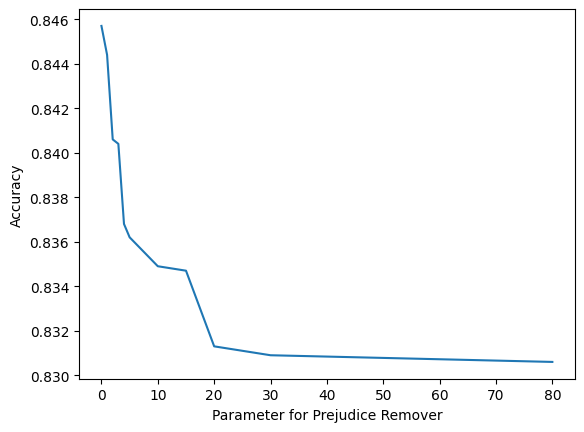

In [30]:
plt.plot(eta_value,eta_accu)
plt.xlabel('Parameter for Prejudice Remover')
plt.ylabel('Accuracy')
plt.show()

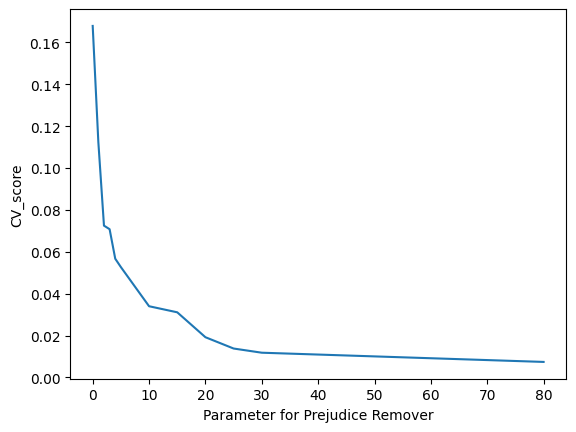

In [31]:
plt.plot(eta_value,eta_cvs)
plt.xlabel('Parameter for Prejudice Remover')
plt.ylabel('CV_score')
plt.show()